In [21]:
#importing useful packages and modules
import numpy as np
import gala.potential as gp
from gala.units import galactic, solarsystem
import astropy.units as u
from astropy.coordinates.matrix_utilities import rotation_matrix
import astropy.coordinates as coord
import gala.coordinates as gc
import gala.dynamics as gd
import gala.integrate as gi
import matplotlib as mpl
import galstreams

from gala.dynamics import mockstream as ms
from matplotlib import pyplot as plt
_ = coord.galactocentric_frame_defaults.set('v4.0')

In [22]:
#MW Potential- bar, bulge

disk = gp.MiyamotoNagaiPotential(m=1E11, a=6.5, b=0.27, units=galactic)
halo = gp.NFWPotential(m=5E11,r_s=18,b=0.94,units=galactic) #is b = q in Pearson et al.2017??
bulge = gp.HernquistPotential(m=3E10, c=0.7, units=galactic)

bar_static= gp.LongMuraliBarPotential(m=1E10, a=3.5,b=0.5,c=0.5,alpha=-27*u.deg,units=galactic)# parameters from gala

pot2_static = gp.CCompositePotential(disk=disk,halo=halo,bulge=bulge,bar=bar_static)



In [23]:
#MW Potential- no bar, bulge

disk = gp.MiyamotoNagaiPotential(m=1E11, a=6.5, b=0.27, units=galactic)
halo = gp.NFWPotential(m=5E11,r_s=18,b=0.94,units=galactic) #is b = q in Pearson et al.2017??
bulge = gp.HernquistPotential(m=3E10, c=0.7, units=galactic)


pot3 = gp.CCompositePotential(disk=disk,halo=halo,bulge=bulge)



In [24]:
no_bar_pot = pot3

Text(0.5, 1.0, 'MW Potential with No Bar')

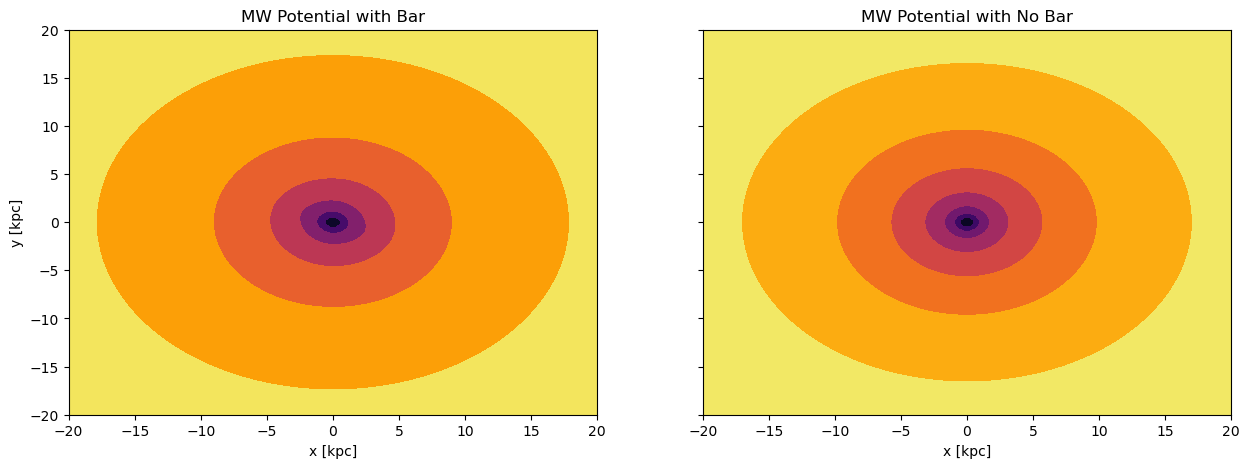

In [25]:
grid = np.linspace(-20, 20, 100)

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True)

pot2_static.plot_contours(grid=(grid,grid,0), ax=axes[0],cmap='inferno')
pot3.plot_contours(grid=(grid, grid, 0), ax=axes[1],cmap='inferno')

axes[0].set_xlabel("x [kpc]") 
axes[1].set_xlabel("x [kpc]") 
axes[0].set_ylabel("y [kpc]") 

axes[0].set_title("MW Potential with Bar")
axes[1].set_title("MW Potential with No Bar")

In [26]:
xyz = np.zeros((3, 1024))
xyz[0] = np.linspace(0, 25, xyz.shape[1])

#np.where( (xyz[0]>7.99) & (xyz[0]<8.01)) getting parameter for the sun (can ignore)

In [27]:
#setting pattern speed
pat_speed = 42. * u.km/u.s/u.kpc

In [28]:
barred_pot = pot2_static 

In [29]:
#setting up rotating reference frame  
static_frame = gp.StaticFrame(galactic)
rot_frame = gp.ConstantRotatingFrame(pat_speed * [0,0,-1], units=barred_pot.units)
rot_barred_pot = gp.Hamiltonian(barred_pot, rot_frame) # rot_barred_pot is the dynamic MW potenial you are requesting for
no_bar_pot = gp.Hamiltonian(no_bar_pot, static_frame)